In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [37]:
data_train = gpd.read_file('train.geojson', index="index")
data_test = gpd.read_file('test.geojson', index="index")
for i in range(1,5):
    data_train[f'date{i}'] = pd.to_datetime(data_train[f'date{i}'],format='%d-%m-%Y')
    data_test[f'date{i}'] = pd.to_datetime(data_test[f'date{i}'],format='%d-%m-%Y')

/Users/gk/repos/ML_kaggle/.venv/lib/python3.13/site-packages/pyogrio/raw.py:200: RuntimeWarning: driver GeoJSON does not support open option INDEX
  return ogr_read(
/Users/gk/repos/ML_kaggle/.venv/lib/python3.13/site-packages/pyogrio/raw.py:200: RuntimeWarning: driver GeoJSON does not support open option INDEX
  return ogr_read(


### Data Head

In [3]:
data_train.head(2)

,urban_type,geography_type,change_type,img_red_mean_date1,img_green_mean_date1,img_blue_mean_date1,img_red_std_date1,img_green_std_date1,img_blue_std_date1,img_red_mean_date2,...,date1,change_status_date1,date2,change_status_date2,date3,change_status_date3,date4,change_status_date4,index,geometry
0,Sparse Urban,"Dense Forest,Grass Land",Road,93.371775,107.291113,89.827379,29.81204,28.328368,25.324294,125.773062,...,09-12-2013,Greenland,10-09-2016,Construction Started,22-07-2019,Construction Done,24-07-2017,Construction Midway,0,"POLYGON ((112.16774 32.02198, 112.16845 32.020..."
1,Sparse Urban,"Dense Forest,Grass Land",Road,96.071674,107.061702,90.755556,24.89624,22.275180,22.080686,133.097679,...,09-12-2013,Greenland,10-09-2016,Land Cleared,22-07-2019,Construction Done,24-07-2017,Construction Midway,1,"POLYGON ((112.16849 32.02048, 112.16891 32.019..."


In [53]:
data_train.columns

Index(['urban_type', 'geography_type', 'change_type', 'img_red_mean_date1',
       'img_green_mean_date1', 'img_blue_mean_date1', 'img_red_std_date1',
       'img_green_std_date1', 'img_blue_std_date1', 'img_red_mean_date2',
       'img_green_mean_date2', 'img_blue_mean_date2', 'img_red_std_date2',
       'img_green_std_date2', 'img_blue_std_date2', 'img_red_mean_date3',
       'img_green_mean_date3', 'img_blue_mean_date3', 'img_red_std_date3',
       'img_green_std_date3', 'img_blue_std_date3', 'img_red_mean_date4',
       'img_green_mean_date4', 'img_blue_mean_date4', 'img_red_std_date4',
       'img_green_std_date4', 'img_blue_std_date4', 'img_red_mean_date5',
       'img_green_mean_date5', 'img_blue_mean_date5', 'img_red_std_date5',
       'img_green_std_date5', 'img_blue_std_date5', 'date0',
       'change_status_date0', 'date1', 'change_status_date1', 'date2',
       'change_status_date2', 'date3', 'change_status_date3', 'date4',
       'change_status_date4', 'index', 'geometry']

### Change Type : the label to predict

In [5]:
[x for x in data_train.change_type.unique() if len(x.split(","))<=1]

['Road',
 'Demolition',
 'Commercial',
 'Residential',
 'Industrial',
 'Mega Projects']

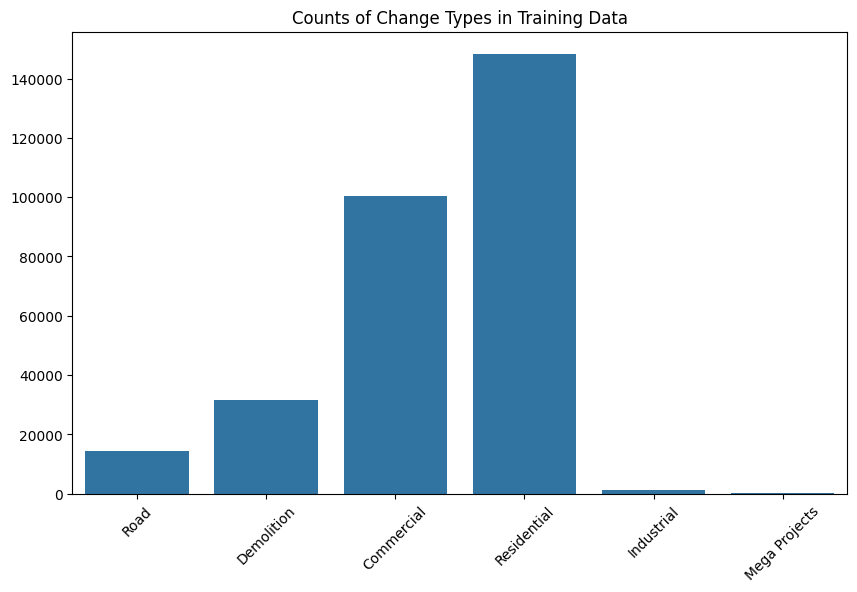

In [6]:
change_type = [x for x in data_train.change_type.unique() if len(x.split(","))<=1]
dict_count = {elem:0 for elem in change_type}
for string in data_train.change_type:
    for elem in string.split(","):
        if elem != 'N' and elem != 'A':
            dict_count[elem]+=1
#plot counts : 
plt.figure(figsize=(10,6))
sns.barplot(x=list(dict_count.keys()), y=list(dict_count.values()))
plt.xticks(rotation=45)
plt.title("Counts of Change Types in Training Data")
plt.show()

In [7]:
print(dict_count)

{'Road': 14305, 'Demolition': 31509, 'Commercial': 100422, 'Residential': 148435, 'Industrial': 1324, 'Mega Projects': 151}


### Urban Type

In [8]:
data_train.urban_type.unique()

<StringArray>
[                      'Sparse Urban',                              'Rural',
                        'Dense Urban',                   'Urban Slum,Rural',
                                'N,A',            'Sparse Urban,Urban Slum',
            'Sparse Urban,Industrial',                         'Industrial',
             'Dense Urban,Industrial',                         'Urban Slum',
              'Urban Slum,Industrial',                   'Rural,Industrial',
           'Sparse Urban,Dense Urban',                 'Sparse Urban,Rural',
             'Dense Urban,Urban Slum', 'Sparse Urban,Urban Slum,Industrial',
                  'Dense Urban,Rural']
Length: 17, dtype: str

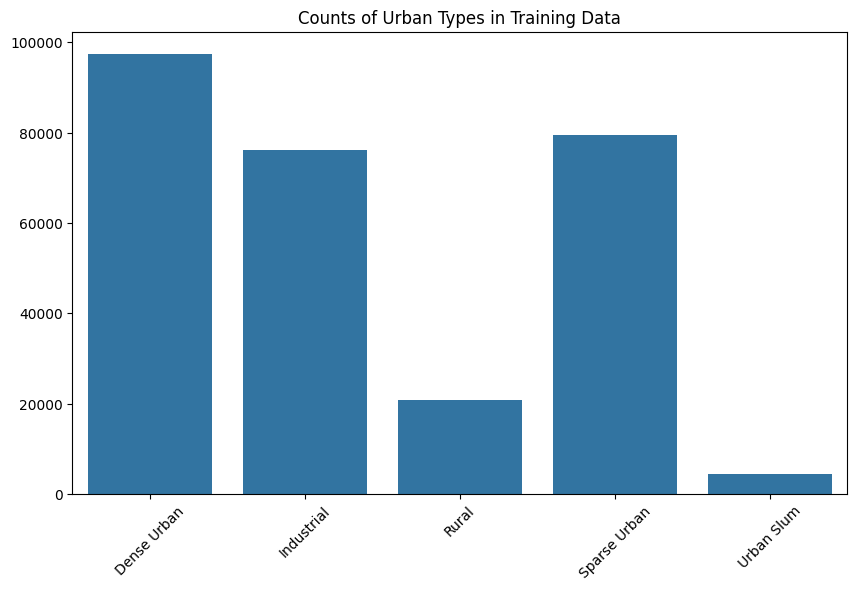

In [9]:
urban = [x for x in data_train.urban_type.unique() if len(x.split(","))<=1]
dict_count = {elem:0 for elem in urban}
for string in data_train.urban_type:
    for elem in string.split(","):
        if elem != 'N' and elem != 'A':
            dict_count[elem]+=1
#plot counts : 
plt.figure(figsize=(10,6))
sns.barplot(x=sorted(list(dict_count.keys())), y=[dict_count[k] for k in sorted(dict_count.keys())])
plt.xticks(rotation=45)
plt.title("Counts of Urban Types in Training Data")
plt.show()

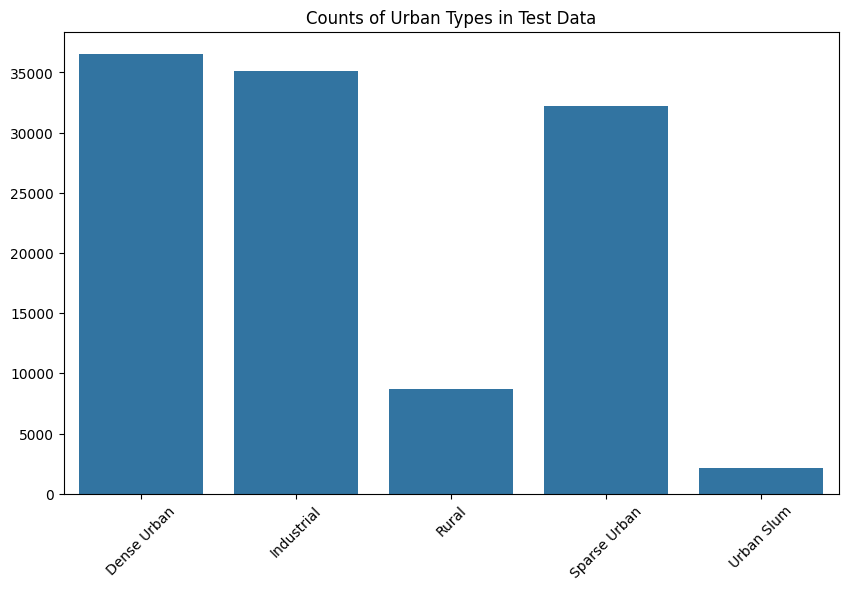

In [10]:
urban = [x for x in data_test.urban_type.unique() if len(x.split(","))<=1]
dict_count = {elem:0 for elem in urban}
for string in data_test.urban_type:
    for elem in string.split(","):
        if elem != 'N' and elem != 'A':
            dict_count[elem]+=1
#plot counts : 
plt.figure(figsize=(10,6))
sns.barplot(x=sorted(list(dict_count.keys())), y=[dict_count[k] for k in sorted(dict_count.keys())])
plt.xticks(rotation=45)
plt.title("Counts of Urban Types in Test Data")
plt.show()

### Geography Types

In [11]:
[x for x in data_train.geography_type.unique() if len(x.split(","))<=1]

['Coastal',
 'Dense Forest',
 'Grass Land',
 'Sparse Forest',
 'Farms',
 'Barren Land',
 'Desert',
 'River',
 'Lakes',
 'Snow',
 'Hills']

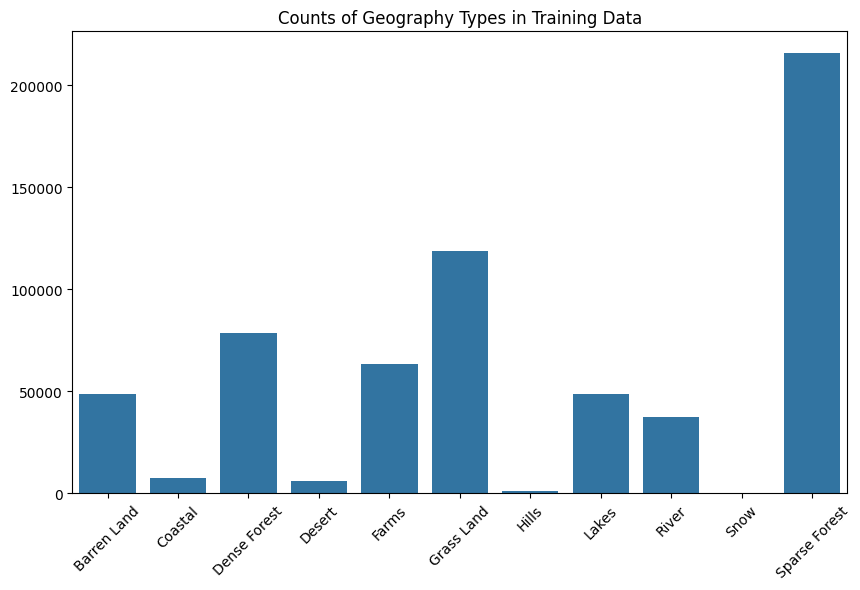

In [12]:
geography = [x for x in data_train.geography_type.unique() if len(x.split(","))<=1]
dict_count = {elem:0 for elem in geography}
for string in data_train.geography_type:
    for elem in string.split(","):
        if elem != 'N' and elem != 'A':
            dict_count[elem]+=1
#plot counts : 
plt.figure(figsize=(10,6))
sns.barplot(x=sorted(list(dict_count.keys())), y=[dict_count[k] for k in sorted(dict_count.keys())])
plt.xticks(rotation=45)
plt.title("Counts of Geography Types in Training Data")
plt.show()

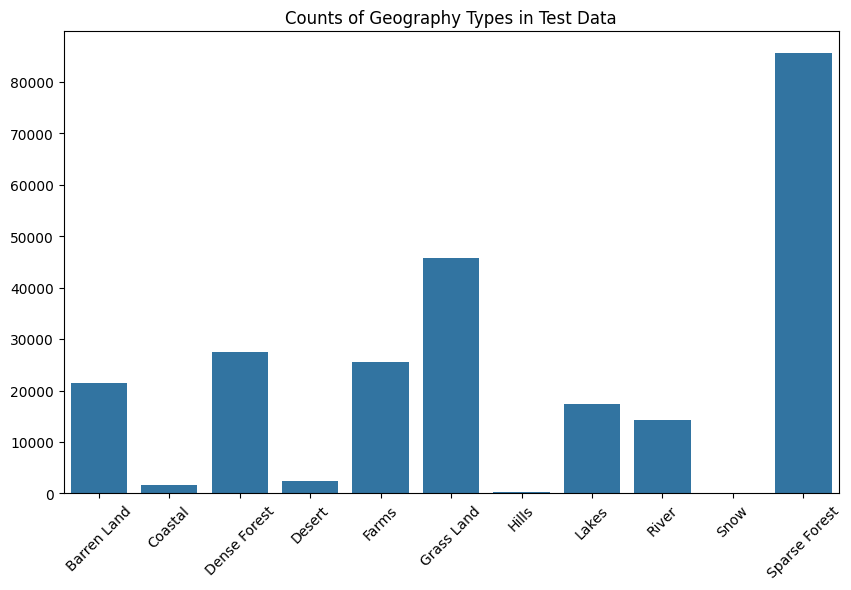

In [13]:
geography = [x for x in data_test.geography_type.unique() if len(x.split(","))<=1]
dict_count = {elem:0 for elem in geography}
for string in data_test.geography_type:
    for elem in string.split(","):
        if elem != 'N' and elem != 'A':
            if not dict_count.get(elem):
                dict_count[elem] = 1
            else:
                dict_count[elem]+=1
#plot counts : 
plt.figure(figsize=(10,6))
sns.barplot(x=sorted(list(dict_count.keys())), y=[dict_count[k] for k in sorted(dict_count.keys())])
plt.xticks(rotation=45)
plt.title("Counts of Geography Types in Test Data")
plt.show()

In [14]:
dict_count

{'Barren Land': 21546,
 'Desert': 2491,
 'Farms': 25462,
 'Sparse Forest': 85528,
 'Coastal': 1661,
 'Grass Land': 45715,
 'River': 14227,
 'Dense Forest': 27591,
 'Lakes': 17469,
 'Hills': 246,
 'Snow': 26}

### Columns with the changes

In [15]:
data_train.change_status_date1.unique(),data_train.change_status_date2.unique(),data_train.change_status_date3.unique(),data_train.change_status_date4.unique()

(<StringArray>
 [           'Greenland',   'Prior Construction',         'Land Cleared',
   'Construction Midway', 'Construction Started',     'Materials Dumped',
  'Materials Introduced',          'Operational',    'Construction Done',
            'Excavation',                    nan]
 Length: 11, dtype: str,
 <StringArray>
 ['Construction Started',         'Land Cleared',   'Prior Construction',
           'Operational',  'Construction Midway',            'Greenland',
            'Excavation',    'Construction Done',     'Materials Dumped',
  'Materials Introduced',                    nan]
 Length: 11, dtype: str,
 <StringArray>
 [   'Construction Done',         'Land Cleared',          'Operational',
    'Prior Construction',  'Construction Midway', 'Construction Started',
             'Greenland',           'Excavation',     'Materials Dumped',
  'Materials Introduced',                    nan]
 Length: 11, dtype: str,
 <StringArray>
 [ 'Construction Midway',         'Land Cleared',

In [16]:
def plot_imgs(color="red",type="mean"):
    fig, axs = plt.subplots(2, 2, figsize=(5, 5))
    data_train_sampled = data_train.sample(n=1000, random_state=42)
    sns.histplot(data_train_sampled[f'img_{color}_{type}_date1'], ax=axs[0, 0],color=color)
    axs[0, 0].set_title('Change Status Date 1')
    sns.histplot(data_train_sampled[f'img_{color}_{type}_date2'], ax=axs[0,1],color=color)
    axs[0, 1].set_title('Change Status Date 2')
    sns.histplot(data_train_sampled[f'img_{color}_{type}_date4'], ax=axs[1,1],color=color)
    axs[1, 1].set_title('Change Status Date 4') 
    sns.histplot(data_train_sampled[f'img_{color}_{type}_date3'], ax=axs[1,0],color=color)
    axs[1, 0].set_title('Change Status Date 3')
    plt.tight_layout()
    plt.suptitle(f'Histogram of {color.capitalize()} Channel {type.capitalize()} Values Across Change Status Dates')
    plt.subplots_adjust(top=0.9)
    plt.show()

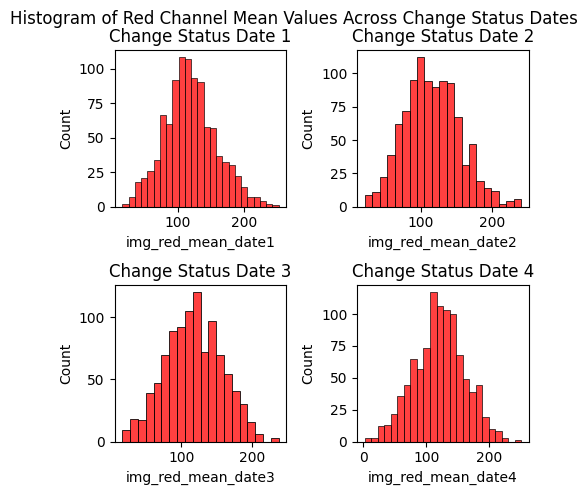

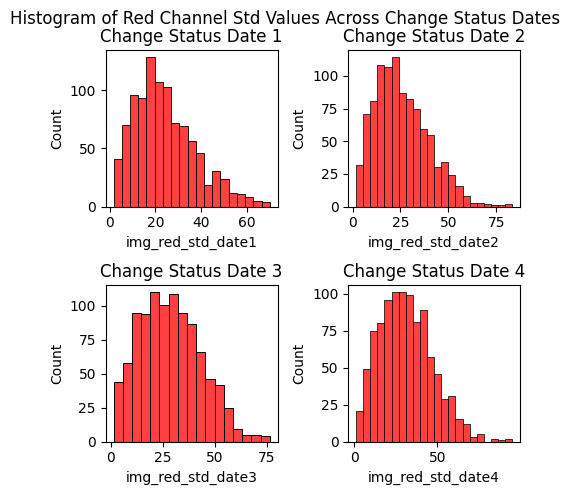

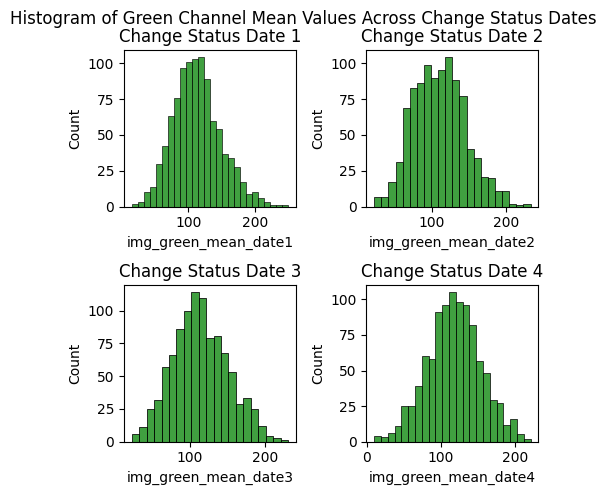

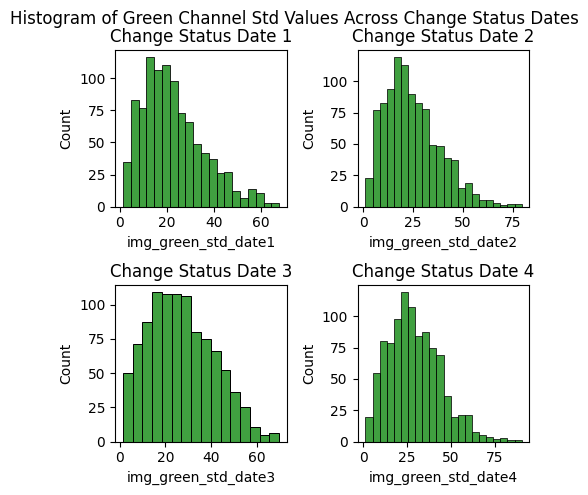

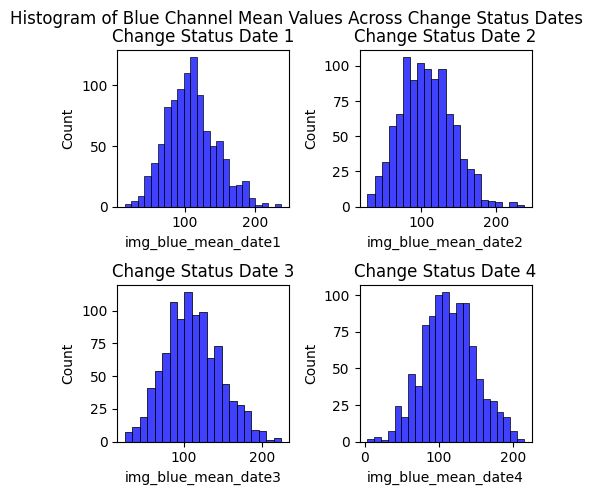

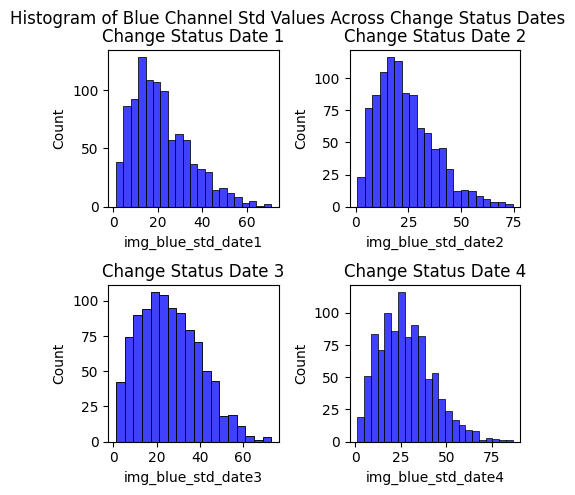

In [17]:
plot_imgs(color="red",type="mean")
plot_imgs(color="red",type="std")
plot_imgs(color="green",type="mean")
plot_imgs(color="green",type="std")
plot_imgs(color="blue",type="mean")
plot_imgs(color="blue",type="std")

### Polygon data

In [18]:
data_train.geometry.head()

0    POLYGON ((112.16774 32.02198, 112.16845 32.020...
1    POLYGON ((112.16849 32.02048, 112.16891 32.019...
2    POLYGON ((112.16892 32.01969, 112.16962 32.018...
3    POLYGON ((112.16966 32.0181, 112.17033 32.0166...
4    POLYGON ((112.16669 32.01597, 112.16677 32.015...
Name: geometry, dtype: geometry

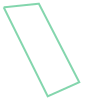

In [19]:
data_train.geometry.loc[0].boundary

In [20]:
print(data_train.geometry.loc[0].centroid)

POINT (112.16835959734397 32.021327094583526)


/var/folders/t2/ddlftbsx24qc5cpks3x4y0gm0000gn/T/ipykernel_88332/4192472258.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_train.geometry.centroid.plot()


<Axes: >

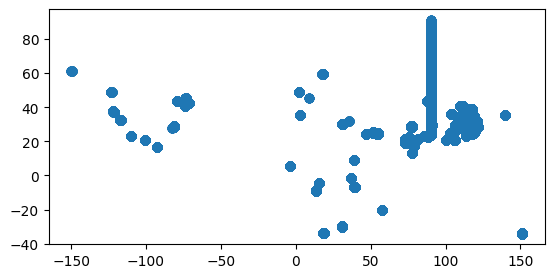

In [21]:
data_train.geometry.centroid.plot()

In [22]:
print(data_train.geometry.to_crs(epsg=3857).loc[0].area)

11947.839230514019


### Polygon area

/var/folders/t2/ddlftbsx24qc5cpks3x4y0gm0000gn/T/ipykernel_88332/1080343246.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sns.displot(data_train.geometry.area*1e9,log_scale=(True, False))


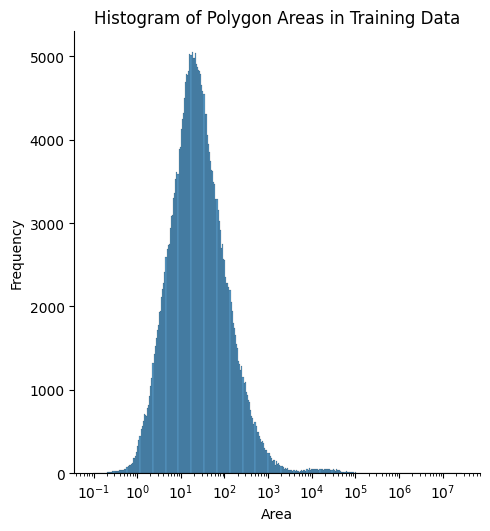

In [23]:
sns.displot(data_train.geometry.area*1e9,log_scale=(True, False))
plt.title("Histogram of Polygon Areas in Training Data")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.show()

/var/folders/t2/ddlftbsx24qc5cpks3x4y0gm0000gn/T/ipykernel_88332/2873370990.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sns.histplot(data_train.geometry.length*1e3, log_scale=(True, True),kde=True)


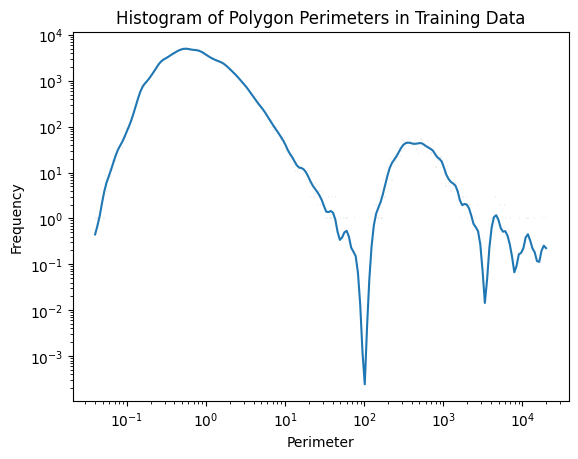

In [24]:
sns.histplot(data_train.geometry.length*1e3, log_scale=(True, True),kde=True)
plt.title("Histogram of Polygon Perimeters in Training Data")
plt.xlabel("Perimeter")
plt.ylabel("Frequency")
plt.show()

In [25]:
data_train.geometry.count_coordinates().sort_values()

0           5
180742      5
180747      5
180748      5
180749      5
         ... 
236831     76
100501     76
101478    100
230343    121
181519    133
Length: 296146, dtype: int32

### Are dates increasing?

In [41]:
date1 = data_train['date1']
date2 = data_train['date2']
date3 = data_train['date3']
date4 = data_train['date4']
(date1 > date2).sum()/len(date1), (date2 > date3).sum()/len(date2), (date3 > date4).sum()/len(date3)

(np.float64(0.5494148156652462),
 np.float64(0.46442970696885993),
 np.float64(0.4798005038055554))

In [42]:
[abs(date4[0]-date3[0]), abs(date3[0]-date2[0]), abs(date2[0]-date1[0])]

[Timedelta('728 days 00:00:00'),
 Timedelta('1045 days 00:00:00'),
 Timedelta('1006 days 00:00:00')]

In [43]:
data_train.change_status_date1.unique()

<StringArray>
[           'Greenland',   'Prior Construction',         'Land Cleared',
  'Construction Midway', 'Construction Started',     'Materials Dumped',
 'Materials Introduced',          'Operational',    'Construction Done',
           'Excavation',                    nan]
Length: 11, dtype: str